# [PUBG Finish Placement Prediction (Kernels Only)](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/overview)
- Can you predict the battle royale finish of PUBG Players?

## 데이터 로드 및 기본 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.4f}'.format

In [2]:
df = pd.read_csv('../../Machine-Running_LJW/Group Project/train_V2.csv')
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0000,0,0,0,60,...,0,0.0000,0,0.0000,0,0,244.8000,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.4700,0,0,0,57,...,0,0.0045,0,11.0400,0,0,1434.0000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0000,0,0,0,47,...,0,0.0000,0,0.0000,0,0,161.8000,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9000,0,0,0,75,...,0,0.0000,0,0.0000,0,0,202.7000,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0000,0,0,0,45,...,0,0.0000,0,0.0000,0,0,49.7500,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.0000,0,0,0,74,...,0,1292.0000,0,0.0000,0,0,1019.0000,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.1500,0,0,0,69,...,0,0.0000,0,0.0000,0,0,81.7000,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.0600,0,0,0,66,...,0,0.0000,0,2.1840,0,0,788.7000,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.4000,1,1,2,11,...,2,0.0000,0,0.0000,0,0,2748.0000,8,0,0.8000


In [ ]:
df.info()

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
df = reduce_mem_usage(df)
df

In [ ]:
df.info()

In [3]:
# target 1 row null data drop

num = df.isna().sum().sum()

df = df.dropna()

print(f'{4446966-len(df)}개의 data를 삭제하였으며, 남은 data의 수는 {len(df)}개 입니다.')

1개의 data를 삭제하였으며, 남은 data의 수는 4446965개 입니다.


In [ ]:
df['matchId'].nunique()

In [ ]:
dfm1 = df[['matchId','groupId']].sort_values('matchId').drop_duplicates(['groupId'])
dfm2 = dfm1['matchId'].values.tolist()
dfm3 = dfm1['groupId'].values.tolist()
dfm4 = df.groupby(['matchId', 'groupId'])['groupId'].count().values.tolist()
dfm5 = pd.DataFrame(zip(dfm3,dfm4), index = dfm2, columns=['groupId', 'groupId count per matchId'])
dfm5

In [ ]:
len(set(dfm2))

In [ ]:
idx = []
for i in df['groupId'].unique():
    if len(df[df['groupId'] == i]) > 4 :
        idx.append(i)
idx

- 각 컬럼별 설명

    - **Id** - 플레이어 아이디
    - **groupId** - 매치 내에서 그룹을 식별하기 위한 ID입니다.   
        같은 그룹의 플레이어가 다른 경기에서 플레이하는 경우 매번 다른 groupId를 갖습니다.
    - **matchId** - 일치를 식별하는 ID입니다.   
        훈련 세트와 테스트 세트 모두에 일치하는 항목이 없습니다.
    - **assists** - 이 플레이어가 피해를 주었고 팀원들에 의해 사망한 적 플레이어의 수입니다. 팀원과 같이 싸웠다는 지표
    - **boosts** - 사용된 부스트 아이템의 수입니다.
    - **DamageDealt** - 가한 총 피해량입니다. 
        참고: 자신이 입힌 피해는 차감됩니다. 팀 합산
    - **DBNO** - 적을 다운시킨 플레이어의 수입니다.
    - **headshotKills** - 헤드샷으로 사망한 적 플레이어의 수입니다.
    - **heals** - 사용된 치유 아이템의 수입니다.
    - **killPlace** - 죽인 적 플레이어 수의 경기 순위입니다.
    - **killPoints** - 플레이어의 킬 기반 외부 순위입니다.  
        (이것을 킬만 중요한 Elo 순위라고 생각하십시오.)  
        rankPoints에 -1 이외의 값이 있는 경우 killPoints의 0은 "없음"으로 처리되어야 합니다.
    - **kills** - 죽인 적 플레이어의 수.
    - **killStreaks** - 짧은 시간에 죽인 적 플레이어의 최대 수입니다.
    - **longKill** - 사망 시 사망한 플레이어와 플레이어 사이의 최장 거리입니다.  
        플레이어를 쓰러뜨리고 drive away하면 가장 긴 킬 통계가 나올 수 있으므로 이는 오해의 소지가 있습니다.
    - **matchDuration** - 경기 시간(초)입니다.
    - **matchType** - 데이터의 출처인 게임 모드를 식별하는 문자열입니다.   
        표준 모드는 "solo", "duo", "squad", "solo-fpp", "duo-fpp" 및 "squad-fpp"입니다.  
        다른 모드는 이벤트 또는 사용자 지정 일치에서 가져온 것입니다.
    - **maxPlace** - 경기에서 데이터가 있는 최악의 위치입니다.  
        데이터가 배치를 건너뛰는 경우가 있으므로 numGroups와 일치하지 않을 수 있습니다.
    - **numGroups** - 경기에서 데이터가 있는 그룹의 수입니다.
    - **rankPoints** - 플레이어의 Elo와 같은 순위입니다.  
        이 순위는 일관성이 없으며 API의 다음 버전에서 더 이상 사용되지 않으므로 주의해서 사용하십시오.  
        -1 값은 "없음"을 대신합니다.
    - **revives** - 이 플레이어가 팀원을 소생시킨 횟수입니다.
    - **rideDistance** - 미터로 측정한 차량의 총 이동 거리입니다.
    - **roadKills** - 차량에 있는 동안 킬 수입니다.
    - **swimDistance** - 미터로 측정한 수영으로 이동한 총 거리.
    - **teamKills** - 이 플레이어가 팀원을 죽인 횟수입니다.
    - **vehicleDestroys** - 파괴된 차량의 수입니다.
    - **walkDistance** - 미터로 측정한 도보로 이동한 총 거리.
    - **weaponAcquired** - 획득한 무기의 수입니다.
    - **winPoints** - 승리 기반 플레이어의 외부 순위입니다.  
        (이것을 승리만이 중요한 Elo 순위라고 생각하십시오.)  
        rankPoints에 -1 이외의 값이 있는 경우 winPoints의 0은 "없음"으로 처리되어야 합니다.
    - **winPlacePerc** - 예측 대상입니다.  
        이것은 백분위수 승리 배치로, 1은 1위, 0은 경기의 마지막 순위에 해당합니다.  
        numGroups가 아닌 maxPlace에서 계산되므로 일치 항목에서 청크가 누락될 수 있습니다.

In [ ]:
# target과의 상관계수 확인

corr = df.corr()
corr = corr.apply(lambda x: round(x ,2))
# corr
corr = corr['winPlacePerc'].sort_values(ascending = False)
corr.to_frame().drop(['winPlacePerc'])

- 각 컬럼별 1차 처리 방안

    - **Id** - 모든 data가 unique 하므로 drop
    - **groupId** - 해당 data가 무엇을 의미하는지 알수 없기에 제거해야 한다고 생각되나, 전처리 후 판단 예정.  
        이상 데이터로 판단 시 drop 혹은 보류.
    - **matchId** - 한 게임 당 인원 수가 부족한 판은 제거.  
        -> 고유값이 60 이하(한 게임당 60명 이하 기준) 데이터는 drop.  
        -> 모델링 시에는 해당 column data 전체를 drop 예정.
    - **assists** - solo mode의 data가 없기 때문에 제거해야 한다고 생각되나,  
        groupId를 사용하게 되면 필요 데이터가 될 수 있다고 판단되어 보류
    - **boosts** - 중요 지표 중 하나로 판단. -> **이상치 제거 후 사용**
    - **DamageDealt** - 중요 지표 중 하나로 판단. -> **이상치 제거 후 사용**
    - **DBNO** - 적을 다운시킨 횟수로, 중요 지표 중 하나로 판단되나 의견이 갈려서 보류.
    - **headshotKills** - 보류
    - **heals** - **이상치 제거 후 사용**
    - **killPlace** - 죽인 적 플레이어 수의 경기 순위입니다. -> **사용**
    - **killPoints** - drop
    - **kills** - 중요 지표 중 하나로 판단. -> **이상치 제거 후 사용**
    - **killStreaks** - ,이상치가 많아 보이며 제거해야된다 판단. ->  보류
    - **longKill** - 중요 데이터는 아닌듯 하여 보류
    - **matchDuration** - drop
    - **matchType** - 전처리를 진행(캐주얼, 노말 Mode drop)후 One-Hot Encoding하여 **사용**. 추후 type별로 모델 학습해 보는것도 고려
    - **maxPlace** - drop
    - **numGroups** - 참가하는 팀이 적을수록 등수에 영향을 미친다? 보류
    - **rankPoints** - 보류
    - **revives** - assists와 동일한 이유로 보류
    - **rideDistance** - 보류
    - **roadKills** - drop
    - **swimDistance** - 보류
    - **teamKills** - drop
    - **vehicleDestroys** - drop
    - **walkDistance** - **이상치 제거 후 사용**
    - **weaponAcquired** - **이상치 제거 후 사용**
    - **winPoints** - 보류
    - **winPlacePerc** - target data

In [ ]:
len(df)

1. 총 3가지 종류 tpp, fpp,  캐주얼모드
    - fpp : 1인칭 모드
    - tpp : 3인칭 모드
    - normal : 일반 모드

2. 고려 대상  
    1) **fpp 모드** : ['duo', 'duo-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp']

2. 제외 대상  
    1) **normal mode** : ['normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp', 'normal-squad', 'normal-squad-fpp']     
    2) **etc** : ['crashfpp', 'crashtpp', 'flarefpp', 'flaretpp']

In [ ]:
matchType = sorted(df['matchType'].unique())
matchType

In [ ]:
matchType = sorted(df['matchType'].unique())
matchType_normal = [word for word in matchType if 'normal' in word]
matchType_fpp = [word for word in matchType if 'normal' not in word if 'crash' not in word if 'flare' not in word]
matchType_etc = [word for word in matchType if word not in matchType_normal if word not in matchType_fpp]
print(matchType_normal)
print(matchType_fpp)
print(matchType_etc)

In [4]:
# 캐쥬얼 모드,사용자 지정 모드를 제외
cond=df.matchType.isin(['squad-fpp','duo-fpp','squad','solo-fpp','duo','solo'])
df = df[cond]

print(f'{4446965-len(df)}개의 data를 삭제하였으며, 남은 data의 수는 {len(df)}개 입니다.')

35267개의 data를 삭제하였으며, 남은 data의 수는 4411698개 입니다.


In [5]:
# matchid 60명 이하인 데이터 drop
matchId_drop = df['matchId'].value_counts().loc[df['matchId'].value_counts()>60].index
df = df.loc[df['matchId'].isin(matchId_drop)]

print(f'{4411698-len(df)}개의 data를 삭제하였으며, 남은 data의 수는 {len(df)}개 입니다.')

21120개의 data를 삭제하였으며, 남은 data의 수는 4390578개 입니다.


In [6]:
# 1차로 보지 않을 컬럼 제외

df = df.drop(columns=['Id',
                 'killPoints',
                 'matchDuration',
                 'maxPlace',
                 'teamKills',
                 'roadKills',
                 'vehicleDestroys',
                ])

In [ ]:
df.head()

In [7]:
# 사용할 컬럼 뽑아오기
df = df.loc[:,['boosts','damageDealt','heals','killPlace','kills','matchType','walkDistance','weaponsAcquired','winPlacePerc']]
df.head()

,boosts,damageDealt,heals,killPlace,kills,matchType,walkDistance,weaponsAcquired,winPlacePerc
0,0,0.0000,0,60,0,squad-fpp,244.8000,1,0.4444
1,0,91.4700,0,57,0,squad-fpp,1434.0000,5,0.6400
2,0,68.0000,0,47,0,duo,161.8000,2,0.7755
3,0,32.9000,0,75,0,squad-fpp,202.7000,3,0.1667
4,0,100.0000,0,45,1,solo-fpp,49.7500,2,0.1875


## 이상치 제거

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390578 entries, 0 to 4446965
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   boosts           int64  
 1   damageDealt      float64
 2   heals            int64  
 3   killPlace        int64  
 4   kills            int64  
 5   matchType        object 
 6   walkDistance     float64
 7   weaponsAcquired  int64  
 8   winPlacePerc     float64
dtypes: float64(3), int64(5), object(1)
memory usage: 335.0+ MB


In [ ]:
df.describe()

In [11]:
numerical_columns = [column for column in df.columns if df[column].dtype in ("int64", "float")]
check_columns = numerical_columns[:-1]
check_columns

['boosts',
 'damageDealt',
 'heals',
 'killPlace',
 'kills',
 'walkDistance',
 'weaponsAcquired']

In [12]:
# https://hwi-doc.tistory.com/entry/IQR-방식을-이용한-이상치-데이터Outlier-제거

dfr1 = df.copy()

for i in check_columns:
    quantile_25 = np.percentile(df[i].values, 25)
    quantile_75 = np.percentile(df[i].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight


    outlier_idx = dfr1[i][ (dfr1[i] < lowest) | (dfr1[i] > highest) ].index
    dfr1 = dfr1.drop(outlier_idx, axis=0)
    print(f'{i} 컬럼의 이상치로 {len(outlier_idx)}개의 data를 삭제하였습니다.')

boosts 컬럼의 이상치로 140118개의 data를 삭제하였습니다.
damageDealt 컬럼의 이상치로 156072개의 data를 삭제하였습니다.
heals 컬럼의 이상치로 235807개의 data를 삭제하였습니다.
killPlace 컬럼의 이상치로 0개의 data를 삭제하였습니다.
kills 컬럼의 이상치로 241505개의 data를 삭제하였습니다.
walkDistance 컬럼의 이상치로 13349개의 data를 삭제하였습니다.
weaponsAcquired 컬럼의 이상치로 42350개의 data를 삭제하였습니다.


In [13]:
dfr1

,boosts,damageDealt,heals,killPlace,kills,matchType,walkDistance,weaponsAcquired,winPlacePerc
0,0,0.0000,0,60,0,squad-fpp,244.8000,1,0.4444
1,0,91.4700,0,57,0,squad-fpp,1434.0000,5,0.6400
2,0,68.0000,0,47,0,duo,161.8000,2,0.7755
3,0,32.9000,0,75,0,squad-fpp,202.7000,3,0.1667
4,0,100.0000,0,45,1,solo-fpp,49.7500,2,0.1875
...,...,...,...,...,...,...,...,...,...
4446961,0,0.0000,0,74,0,squad-fpp,1019.0000,3,0.1786
4446962,1,44.1500,0,69,0,solo,81.7000,6,0.2935
4446963,0,59.0600,0,66,0,squad-fpp,788.7000,4,0.4815
4446964,4,180.4000,2,11,2,squad-fpp,2748.0000,8,0.8000


C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


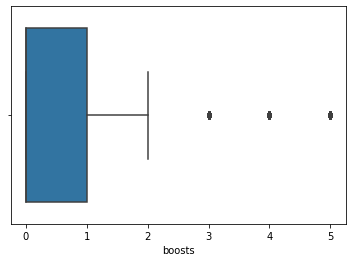

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


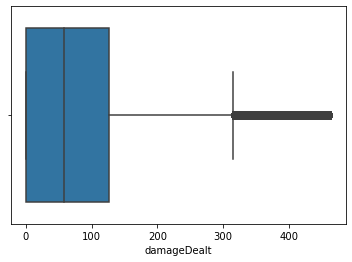

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


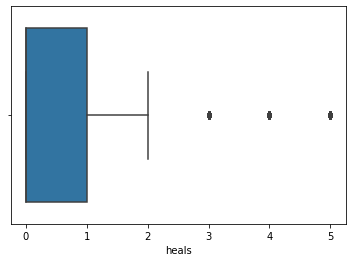

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


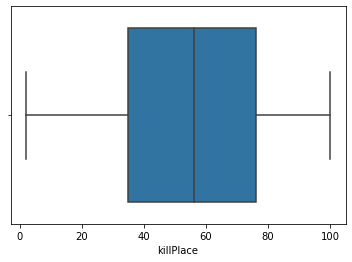

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


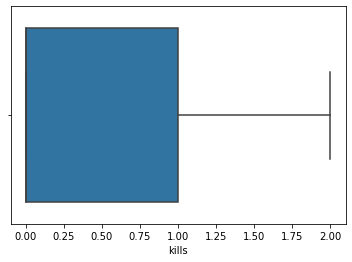

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


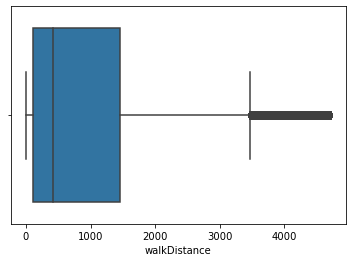

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


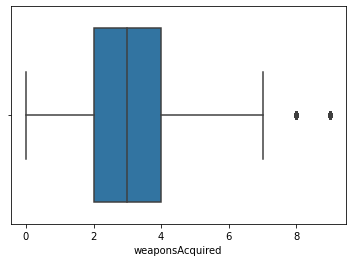

In [14]:
for i in check_columns:
    sns.boxplot(dfr1[i])
    plt.show()

## 머신러닝

In [15]:
df1 = pd.get_dummies(df.matchType, prefix='matchType')
train = pd.concat([df, df1], axis=1)
train = train.drop('matchType', axis=1)
train.head()

,boosts,damageDealt,heals,killPlace,kills,walkDistance,weaponsAcquired,winPlacePerc,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0.0000,0,60,0,244.8000,1,0.4444,0,0,0,0,0,1
1,0,91.4700,0,57,0,1434.0000,5,0.6400,0,0,0,0,0,1
2,0,68.0000,0,47,0,161.8000,2,0.7755,1,0,0,0,0,0
3,0,32.9000,0,75,0,202.7000,3,0.1667,0,0,0,0,0,1
4,0,100.0000,0,45,1,49.7500,2,0.1875,0,0,0,1,0,0


In [16]:
y = train[['winPlacePerc']]
X = train.drop(columns ='winPlacePerc')

In [17]:
display(y)
display(X)

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446961,0.1786
4446962,0.2935
4446963,0.4815
4446964,0.8000


,boosts,damageDealt,heals,killPlace,kills,walkDistance,weaponsAcquired,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0.0000,0,60,0,244.8000,1,0,0,0,0,0,1
1,0,91.4700,0,57,0,1434.0000,5,0,0,0,0,0,1
2,0,68.0000,0,47,0,161.8000,2,1,0,0,0,0,0
3,0,32.9000,0,75,0,202.7000,3,0,0,0,0,0,1
4,0,100.0000,0,45,1,49.7500,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0.0000,0,74,0,1019.0000,3,0,0,0,0,0,1
4446962,1,44.1500,0,69,0,81.7000,6,0,0,1,0,0,0
4446963,0,59.0600,0,66,0,788.7000,4,0,0,0,0,0,1
4446964,4,180.4000,2,11,2,2748.0000,8,0,0,0,0,0,1


In [18]:
# scale을 지정하여 모델을 생성
#   StandardScaler를 이용해서 학습하면 R-squared를 유지하면서 Cond. No.를 줄일수 있습니다.

from sklearn.preprocessing import StandardScaler         # 평균이 0과 표준편차가 1이 되도록 변환.
from sklearn.preprocessing import MinMaxScaler           # 최대값이 각각 1, 최소값이 0이 되도록 변환록 변환.
from sklearn.preprocessing import RobustScaler           # 중앙값(median) 0이 되도록 변환
from sklearn.preprocessing import Normalizer             # 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

new_scaler = StandardScaler()
# new_scaler = MinMaxScaler()
# new_scaler = RobustScaler()
# new_scaler = mean_absolute_erro

X = new_scaler.fit_transform(X)

In [19]:
# 데이터셋 분리

from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((3512462, 13), (3512462, 1), (878116, 13), (878116, 1))

In [20]:
# 선형 회귀

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression().fit(train_X, train_y)

In [21]:
# 모델 평가

pred_y = model.predict(test_X)
mean_absolute_error(test_y, pred_y)

0.1032502117876363

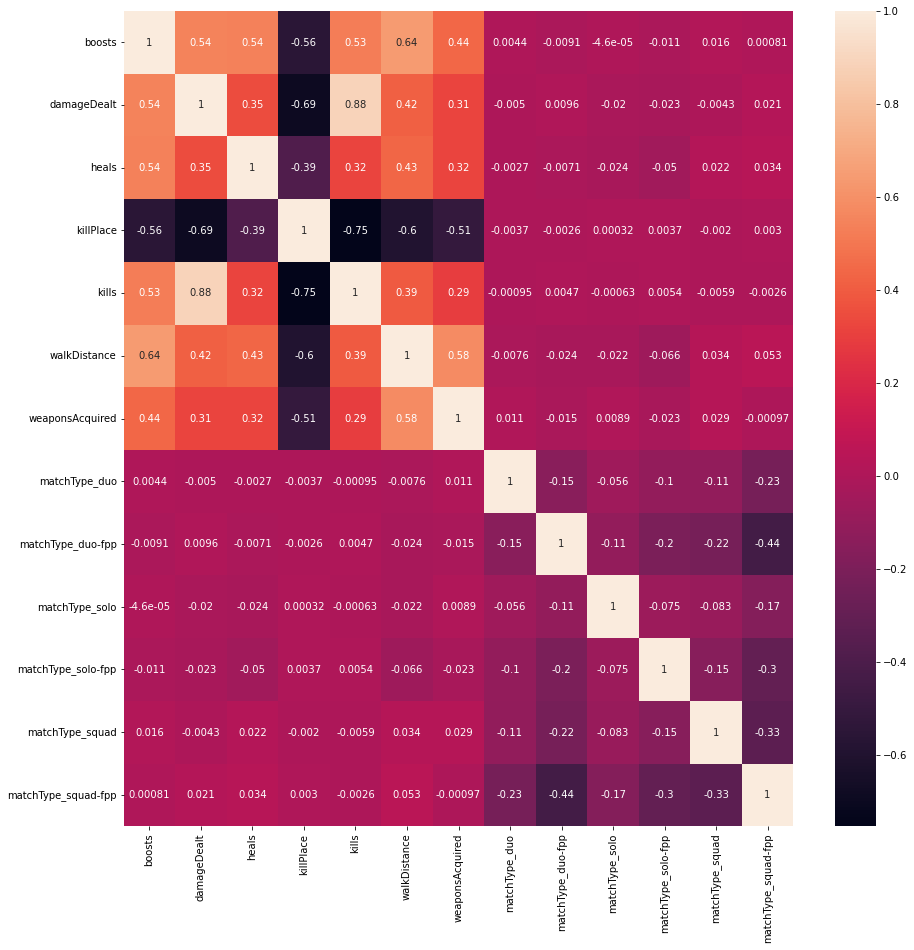

In [22]:
# feature들의 다중공선성 확인1

plt.figure(figsize=(15,15))
sns.heatmap(train.drop(columns ='winPlacePerc').corr(), annot=True)
plt.show()

In [ ]:
# killPlace와 kills, walkDistance, weaponsAcquired의 상관계수가 다른 feature들에 대한 상관계수보다 상대적으로 높다는것을 확인

In [23]:
# kills 제외 후 다시 연산

y = train[['winPlacePerc']]
X = train.drop(columns =['kills','winPlacePerc'])

X = new_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression().fit(train_X, train_y)

pred_y = model.predict(test_X)
mean_absolute_error(test_y, pred_y)

0.10776606777021445

- feature들의 다중공선성 확인 방법 2
    - VIF(Variance inflation factor)
        - 분산 팽창 요인
        - 변수들간의 correlation을 진단하는 방법
        - 특정 feature를 y값으로 설정하여 모델을 만들었을때 나오는 결정계수(r-squared)로 아래의 수식을 연산

In [24]:
# VIF 지표

# 데이터 프레임으로 출력

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(train.drop(columns ='winPlacePerc').values, idx) for idx in range(train.drop(columns ='winPlacePerc').shape[1])],
    "features": train.drop(columns ='winPlacePerc').columns,
    })

,VIF Factor,features
0,2.3016,boosts
1,4.8197,damageDealt
2,1.4560,heals
3,3.3209,killPlace
4,5.8535,kills
5,2.3522,walkDistance
6,1.6510,weaponsAcquired
7,2.8290,matchType_duo
8,6.7819,matchType_duo-fpp
9,2.0075,matchType_solo


In [25]:
# matchType_squad-fpp 제외 후 다시 연산
#    matchType_squad-fpp의 VIF 수치가 10을 초과

y = train[['winPlacePerc']]
X = train.drop(columns =['matchType_duo-fpp','matchType_squad-fpp','winPlacePerc'])

X = new_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression().fit(train_X, train_y)

pred_y = model.predict(test_X)
mean_absolute_error(test_y, pred_y)

0.10412568986398323

In [ ]:
# mae 값에 큰 수치 변화가 없음.

In [26]:
# 다항회귀
#   train_X 데이터를 다항식으로 변경

# feature값 행렬 데이터로 변경
from sklearn.preprocessing import PolynomialFeatures

# 모델의 학습은 선형대수로 계산이 되기 때문에 제곱한 feature를 추가
poly_features = PolynomialFeatures(degree=2, include_bias=False)   # 2차방정식

y = train[['winPlacePerc']]
X = train.drop(columns ='winPlacePerc')

In [27]:
# 2차항 : 다항회귀 적용

newX = []
columns = []
for i in X.columns:
    newX.append(poly_features.fit_transform(X[[i]]))
    columns.append(i)
    columns.append(i+"2")
newX = np.column_stack(newX)
# numpy 배열을 옆으로 붙이기https://rfriend.tistory.com/352
newX_df = pd.DataFrame(newX, columns = columns)
newX_df.head()

,boosts,boosts2,damageDealt,damageDealt2,heals,heals2,killPlace,killPlace2,kills,kills2,...,matchType_duo-fpp,matchType_duo-fpp2,matchType_solo,matchType_solo2,matchType_solo-fpp,matchType_solo-fpp2,matchType_squad,matchType_squad2,matchType_squad-fpp,matchType_squad-fpp2
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,60.0000,3600.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
1,0.0000,0.0000,91.4700,8366.7609,0.0000,0.0000,57.0000,3249.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
2,0.0000,0.0000,68.0000,4624.0000,0.0000,0.0000,47.0000,2209.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,32.9000,1082.4100,0.0000,0.0000,75.0000,5625.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
4,0.0000,0.0000,100.0000,10000.0000,0.0000,0.0000,45.0000,2025.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000


In [28]:
train_X, test_X, train_y, test_y = train_test_split(newX_df, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(train_X, train_y)

pred_y = model.predict(test_X)
mean_absolute_error(test_y, pred_y)

0.0890410903647635

In [29]:
# Scale 후 학습 진행

y = train[['winPlacePerc']]
X = new_scaler.fit_transform(newX_df)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(train_X, train_y)

pred_y = model.predict(test_X)
mean_absolute_error(test_y, pred_y)

0.08904161972393272

In [30]:
# 최적의 차원을 구하는 방법

y = train[['winPlacePerc']]
X = train.drop(columns ='winPlacePerc')

def model_mae(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)   # 3차방정식
    
    newX = []
    columns = []
    for i in X.columns:
        newX.append(poly_features.fit_transform(X[[i]]))
    newX = np.column_stack(newX)
    newX_df = pd.DataFrame(newX)
    newX_df.head()

    train_X, test_X, train_y, test_y = train_test_split(newX_df, y, test_size=0.2, random_state=42)

    model = LinearRegression().fit(train_X, train_y)

    pred_y = model.predict(test_X)
    return mean_absolute_error(test_y, pred_y)

In [31]:
# 1차원에서 10차원까지 학습

evaluation_df = pd.DataFrame(columns=["degree", "mae"])
for degree in range(1, 11):
    mae = model_mae(degree)
    evaluation_df.loc[len(evaluation_df)] = [degree, mae]
evaluation_df

,degree,mae
0,1.0000,0.1032
1,2.0000,0.0890
2,3.0000,0.0782
3,4.0000,0.0800
4,5.0000,0.1012
5,6.0000,0.1160
6,7.0000,0.1685
7,8.0000,0.2279
8,9.0000,0.4116
9,10.0000,0.6067


In [32]:
# 2차원 ~ 4차원 mae 수치 각각 확인

print(model_mae(2))
print(model_mae(3))
print(model_mae(4))

0.0890410903647635
0.07815139614839477
0.07998231938141977


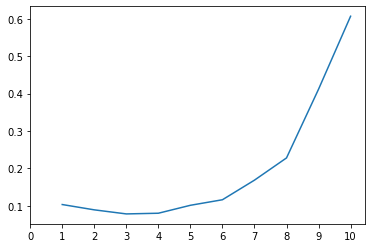

In [33]:
# degree 3이 가장 적당
# 차원이 증가함에 따라 계산량이 많아짐, 계산량이 많아지면 모델성능의 이득도 증가해야 함
# 차원이 증가할수록 모델에 대한 성능의 이득이 가장 많은 차원을 결정
plt.plot(evaluation_df["degree"], evaluation_df["mae"])
plt.xticks(list(range(11)))

plt.show()

# 선형회귀보다는 3차원으로 해석하는 것이 좋은데, 그렇게 해석하려고 하니 무엇이 문제인가?
# 선형회귀를 쓰자니 속도가 빠르고, 3차원으로 하자니 계산 양이 많아짐. -> 예측 속도에 대한 고민